In [1]:
import eddytools as et
import xmitgcm as xm
import numpy as np
import xarray as xr

In [2]:
# paths
datapath = r'D:\MITgcm_results_Leman_Sep2021\results'
gridpath = r'D:\MITgcm_results_Leman_Sep2021\results'
outputpath = 'C:\\Users\\leroquan\\Documents\\python\\eddytools\\workspace\\nencioli\\'

In [8]:
# load data
dt = 4.
data = xm.open_mdsdataset(datapath, delta_t=dt,
                            ignore_unknown_vars=True, grid_dir=gridpath, 
                            geometry="cartesian", calendar="standard", ref_date="2021-07-26 0:0:0", 
                            prefix="3Dsnaps", endian='<')

In [13]:
start_date_analysis = np.datetime64('2021-09-09T20:30:00.000000000')
end_date_analysis = np.datetime64('2021-09-10T00:30:00.000000000')

data_cropped = data.sel(time=slice(start_date_analysis, end_date_analysis))
data_cropped = data_cropped.isel(Z=[0,1])

In [4]:
data_cropped["SPEED"] = np.sqrt(data_cropped["UVEL"]**2 + data_cropped["VVEL"]**2)

In [22]:
VVEL_new = data_cropped["VVEL"].rename({"YG": "lat", "XC": "lon", "Z": "Depth"}).assign_coords(lat=data_cropped["YC"].values)
UVEL_new = data_cropped["UVEL"].rename({"XG": "lon", "YC": "lat", "Z": "Depth"}).assign_coords(lon=data_cropped["XC"].values)

data_aligned = xr.Dataset(
    {
        "UVEL": UVEL_new,
        "VVEL": VVEL_new,
    },
    coords={
        "lon": data_cropped["XC"].values,
        "lat": data_cropped["YC"].values,
        "Depth": data_cropped['Z'].values
    },
)

data_aligned["SPEED"] = np.sqrt(data_aligned["UVEL"]**2 + data_aligned["VVEL"]**2)

In [39]:
# Specify parameters for eddy detection
detection_parameters = {'model': 'MITgcm',
                        'grid': 'cartesian',
                        'hemi': 'north',
                        'start_time': '2021-09-09T22:30:00.000000000', # time range start
                        'end_time': '2021-09-10', # time range end
                        'calendar': 'standard', # calendar, must be either 360_day or standard
                        'lon1': 50, # minimum longitude of detection region
                        'lon2': 65000, # maximum longitude
                        'lat1': 50, # minimum latitude
                        'lat2': 25000, # maximum latitude
                        'res': 10., # resolution of the fields in km
                        'min_dep': 250, # minimum ocean depth where to look for eddies in m
                        'Npix_min': 1000, # minimum number of pixels (grid cells) to be considered as eddy
                        'Npix_max': 5000, # maximum number of pixels (grid cells)
                        'no_long': False, # If True, elongated shapes will not be considered
                        'no_two': False, # If True, eddies with two minima in the OW
                                        # parameter and a OW > OW_thr in between  will not
                                        # be considered
                        'a': 10,
                        'b': 1,
                        'rad': 3
                       }

In [40]:
et.detection.detect_UV(data_aligned, detection_parameters, 'UVEL', 'VVEL', 'SPEED')

preparing data for eddy detection (masking and region extracting etc.)
step2
step3
step3.0
step4
step5
step5
detection at time step  1  of  5
step5
detection at time step  2  of  5
step5
detection at time step  3  of  5
step5
detection at time step  4  of  5
step5
detection at time step  5  of  5


{0: {}, 1: {}, 2: {}, 3: {}, 4: {}}

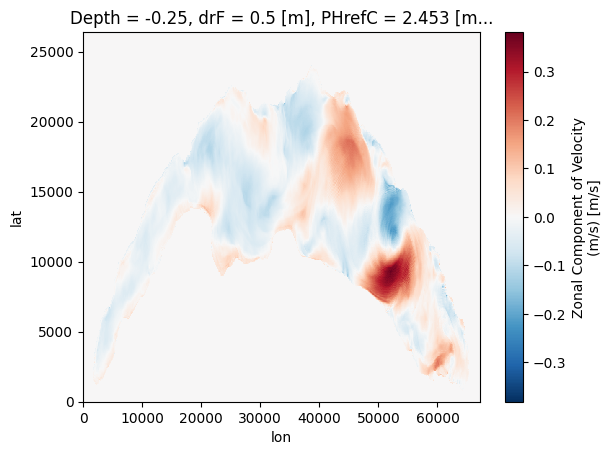

In [32]:
data_aligned['UVEL'].isel(time=0, Depth=0).plot()